# Trajectory inference for hematopoiesis in mouse

Reconstructing myeloid and erythroid differentiation for data of [Paul et al. (2015)](http://doi.org/10.1016/j.cell.2015.11.013).

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc
import utils as ut


In [76]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
sc.settings.set_figure_params(dpi=100, frameon=False, figsize=(3, 3), facecolor='white')  # low dpi (dots per inch) yields small inline figures

In [77]:
data_path= "saved/adata/h5ad/GSE1178722021-05-12-12-03-30.h5ad"
results_file = data_path+'.trajectory.h5ad'

In [78]:
adata = sc.read_h5ad(filename=data_path)
sc.settings.set_figure_params(dpi=150, frameon=False, figsize=(3.5, 3.5), facecolor='white')  # low dpi (dots per inch) yields small inline figures

In [79]:
adata

AnnData object with n_obs × n_vars = 568 × 7350
    obs: 'cell_color', 'patient_id', 'origin', 'drug_status', 'cluster', 'pca_clusters', 'pagoda_clusters', 'Unnamed: 8', 'sensitive', 'sensitivity', 'Resistant_score', 'Sensitive_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt-', 'pct_counts_mt-', 'total_counts_rps', 'pct_counts_rps', 'total_counts_rpl', 'pct_counts_rpl', 'leiden', 'leiden_origin', 'sens_preds_pret', 'sens_label_pret', 'sens_preds', 'sens_label', 'rest_preds', '0_score', '1_score', 'sens_truth', 'leiden_trans', 'leiden_Pret', 'dpt_pseudotime'
    var: 'n_cells', 'mt-', 'rps', 'rpl', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Pret', 'Trans', 'diffmap_evals', 'difftrans', 'draw_graph', 'hvg', 'iroot', 'leiden', 'leiden_Pret_colors', 'leiden_colors', 'leiden_origin_colors', 'leiden_sizes', 'leiden_trans_colors', 'leiden_trans_size

In [80]:
#adata.obs.loc[adata.obs['cluster']=="Holiday","sensitivity"]='Resistant'
#adata = ut.de_score(adata=adata,clustername="sensitivity",pval=0.05,n=50)


In [81]:
adata.obsm["X_umap"] = adata.obsm["X_umap_origin"]

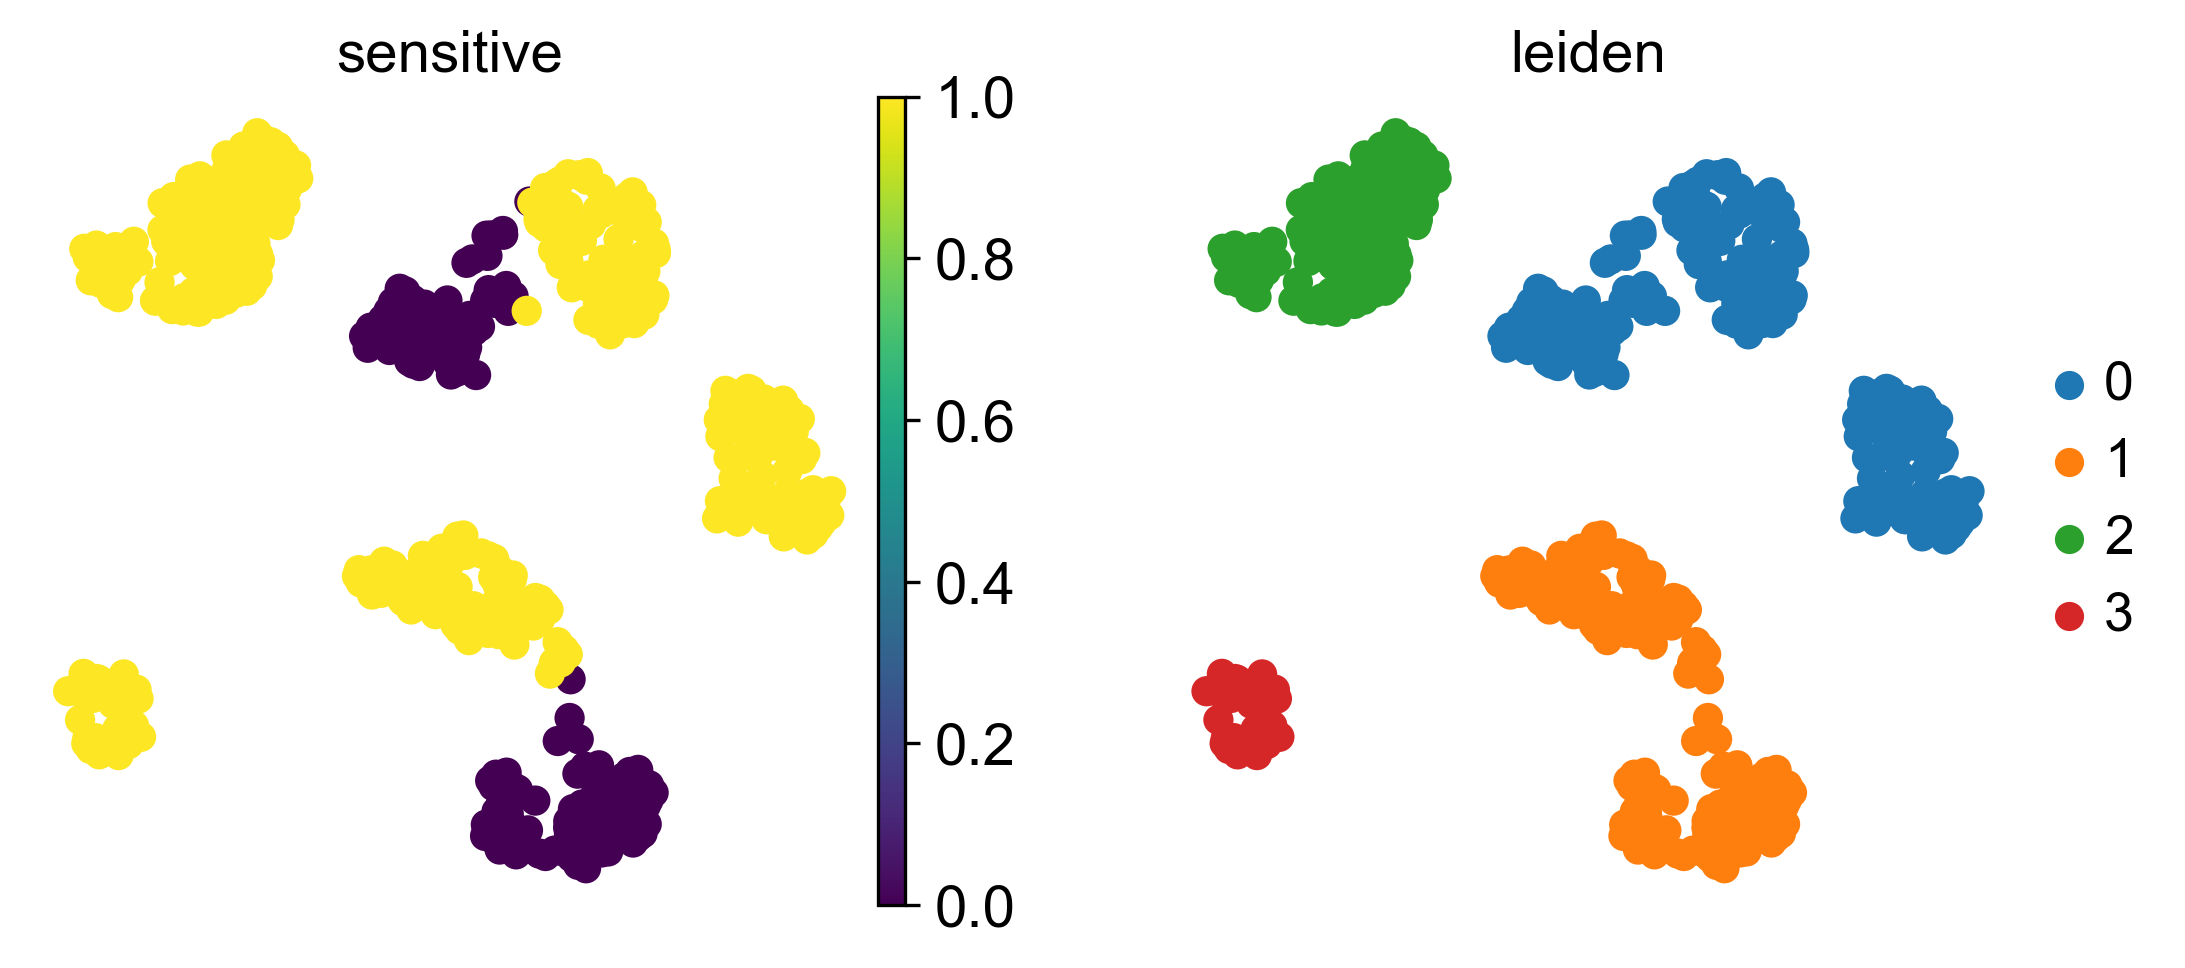

In [82]:
sc.pl.umap(adata,color=['sensitive','leiden'])

In [83]:
sc.pp.neighbors(adata,use_rep='X_Trans',key_added="Trans")
sc.tl.umap(adata,neighbors_key="Trans")

computing neighbors
    finished: added to `.uns['Trans']`
    `.obsp['Trans_distances']`, distances for each pair of neighbors
    `.obsp['Trans_connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


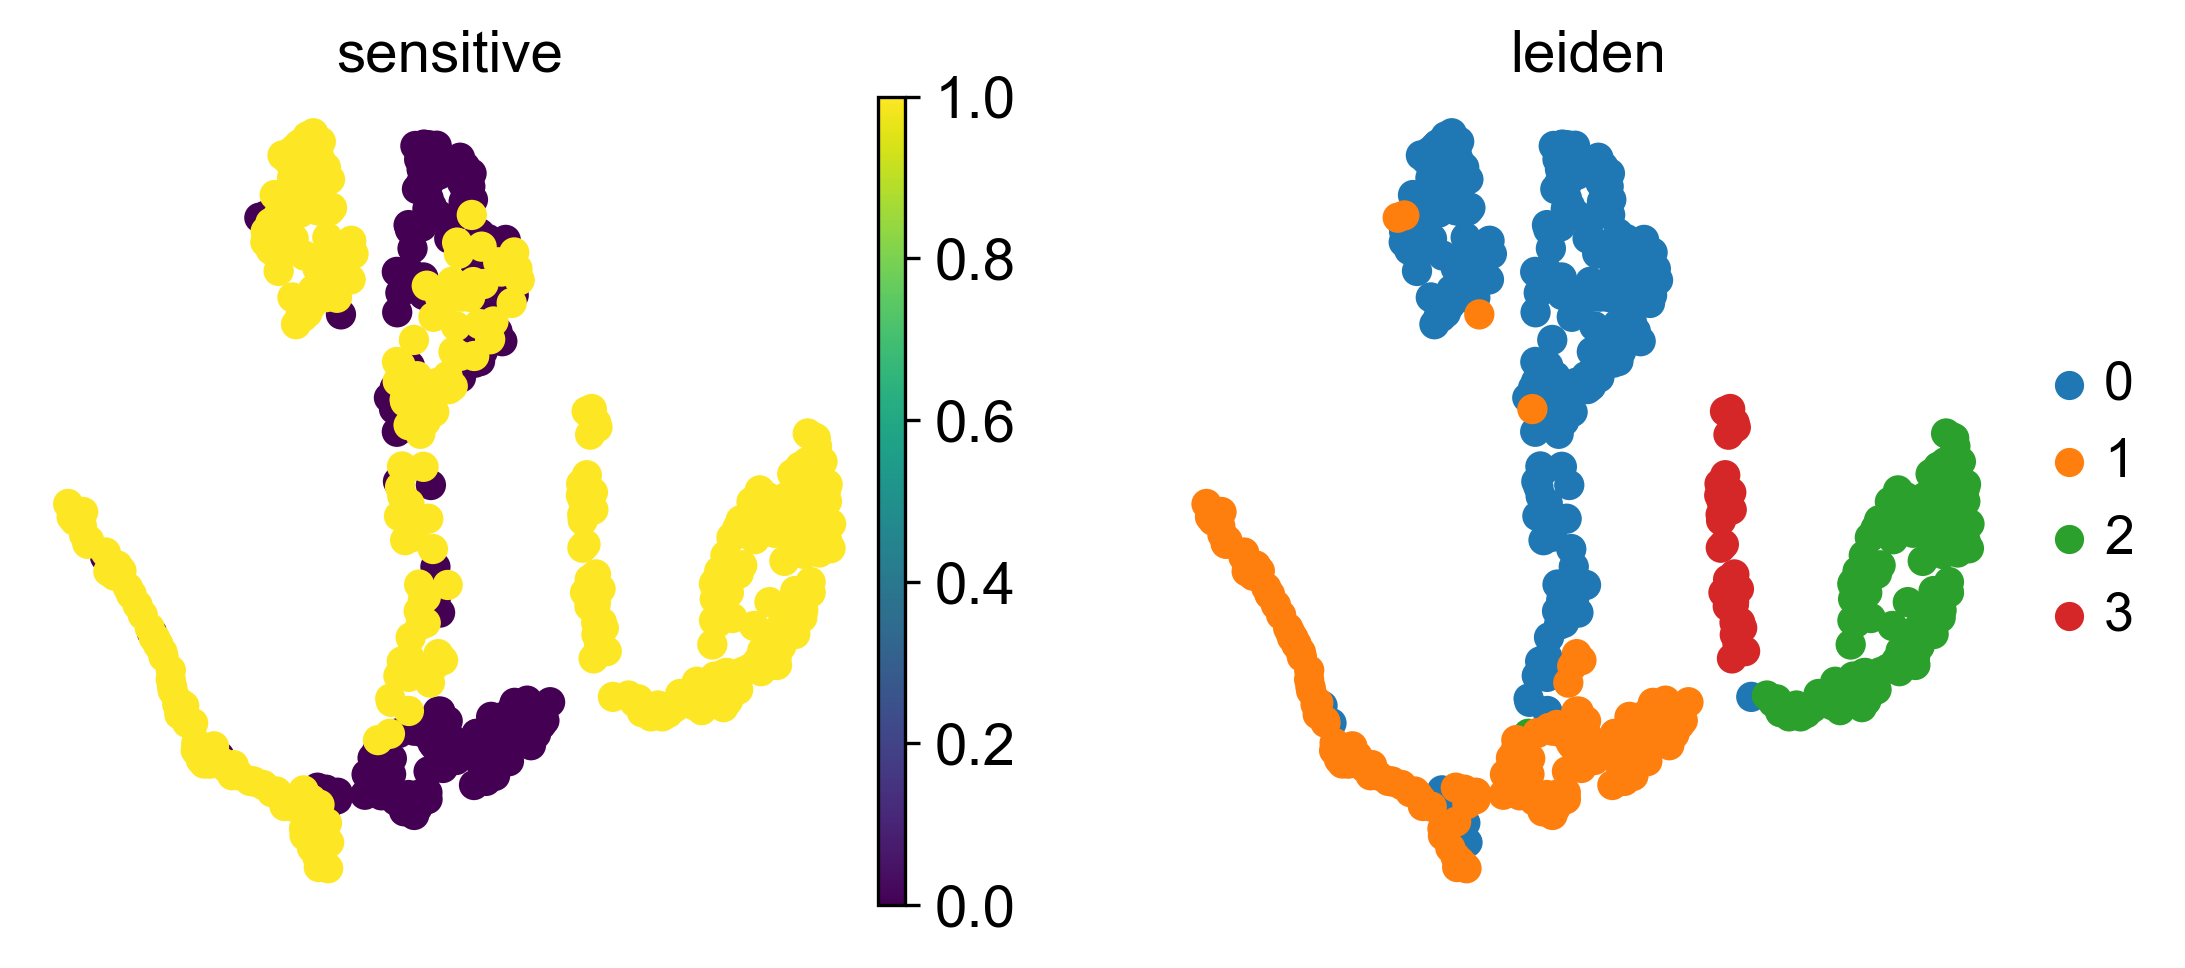

In [84]:
sc.pl.umap(adata,color=['sensitive','leiden'])